<center><h1>Mining Twitter Data Using Python / Tweepy</h1></center>

## Main script that parses the stream of tweets based on a filter word

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

## Then run this script below to create a Python dataframe of the tweets data text file

In [2]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'nsx_tweets.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:            # Ensure json data is complete
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

3487


### Create pandas dataframe

In [3]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

### You may be wondering why did I create a "sample" column?  The reason being, it will be used to determine if a tweet is a duplicate to another tweet.  Basically, my logic is, if the first 20 characters are the same between tweets, then I am assuming they are the exact same.  Whether or not this is a good logic to use, I dont' know, but seems to be the easiest way I can think of.

### Let's remove redundant tweets, retweets, duplicates, and limit to English tweets

In [4]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False) 
                        & ~(tweets['text'].str.contains('vmware')) 
                        & ~(tweets['text'].str.contains('vm ware'))
                        & ~(tweets['text'].str.contains('virtualization'))
                       ]

In [5]:
english_tweets = english_tweets.drop_duplicates(subset='sample');

In [6]:
english_tweets.head(50)

,text,lang,sample,retweeted
0,afternoon tea powered by honda's nsx\n⇒https://t.co/esrynes9so,en,Afternoon tea powere,False
4,rt @carmagazine: watch out @bmw i8? we drive the new @honda and @acura nsx hybrid sports car https://t.co/ejx5jjivow https://t.co/toitupxalq,en,RT @CARmagazine: Wat,False
5,apply now to work for british sky broadcasting as #retail #sales advisor (sky retail stores) maidenhead in # #jobs https://t.co/assnxuqjwl,en,Apply now to work fo,False
9,"saw some dude driving around burlington in an early-90s acura nsx. there's no way that guy doesn't have people call him the wolf, right?",en,Saw some dude drivin,False
10,chrome nsx lm race car lap@brands hatch https://t.co/oot0zckzya via @youtube,en,Chrome nsx lm race c,False
11,rt @fojta: vcloud director 8.0 has been validated with nsx 6.2 and is fully supported: https://t.co/sumjwvggks,en,RT @fojta: vCloud Di,False
12,finally saw an nsx😍😍😍,en,Finally saw an NSX😍😍,False
14,hot wheels '12 acura nsx concept| https://t.co/ockqp1x1o1 #hotwheels #tokopedia #hotwheelsindonesia #jualhotwheels,en,Hot WHeels '12 Acura,False
31,the honda nsx at the tokyo motor show 2015 https://t.co/zd1dgkc9ya,en,The Honda NSX at the,False
35,2017 acura nsx - official test drive 🚘😎\n► https://t.co/kjyro1yqcs,en,2017 Acura NSX - Off,False


In [7]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")  # Replace 's with a space since I don't care about the possessive form
                                                 # of the noun

## Now create the word cloud

/home/pybokeh/miniconda3/envs/jupyter/lib/python3.4/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


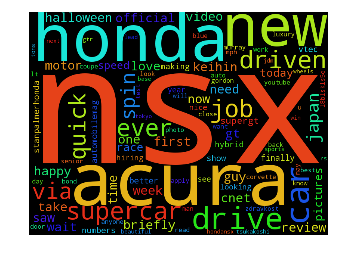

In [18]:
%matplotlib inline
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')

additional_words = [
    'rt',
    'ebay',
    'http',
    'https',
]

for word in additional_words:
    STOPWORDS.add(word)

wc = WordCloud(width=800, height=600, max_words=100).generate(text)

# store to file
wc.to_file(path.join(d, "nsx.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.show()

In [13]:
wc.layout_

[(('nsx', 1.0), 442, (182, 1), None, 'hsl(225, 80%, 50%)'),
 (('acura', 0.4066390041493776), 191, (1, 172), None, 'hsl(101, 80%, 50%)'),
 (('honda', 0.23651452282157676), 182, (427, 221), None, 'hsl(159, 80%, 50%)'),
 (('new', 0.16182572614107885), 129, (438, 1), None, 'hsl(22, 80%, 50%)'),
 (('car', 0.13692946058091288), 100, (86, 3), None, 'hsl(16, 80%, 50%)'),
 (('drive', 0.12033195020746888), 82, (107, 487), None, 'hsl(103, 80%, 50%)'),
 (('supercar', 0.07053941908713693),
  63,
  (107, 151),
  None,
  'hsl(79, 80%, 50%)'),
 (('driven', 0.058091286307053944), 63, (530, 3), None, 'hsl(220, 80%, 50%)'),
 (('job', 0.05394190871369295), 63, (6, 44), None, 'hsl(180, 80%, 50%)'),
 (('ever', 0.05394190871369295), 63, (232, 430), None, 'hsl(172, 80%, 50%)'),
 (('quick', 0.04564315352697095), 50, (193, 231), 2, 'hsl(185, 80%, 50%)'),
 (('via', 0.04564315352697095), 50, (338, 337), None, 'hsl(126, 80%, 50%)'),
 (('spin', 0.04149377593360996), 50, (274, 486), None, 'hsl(78, 80%, 50%)'),
 (('j

In [11]:
wc.words_

[('https', 1.0),
 ('nsx', 0.8992537313432836),
 ('acura', 0.3656716417910448),
 ('honda', 0.2126865671641791),
 ('new', 0.1455223880597015),
 ('car', 0.12313432835820895),
 ('drive', 0.10820895522388059),
 ('supercar', 0.06343283582089553),
 ('driven', 0.05223880597014925),
 ('job', 0.048507462686567165),
 ('ever', 0.048507462686567165),
 ('quick', 0.041044776119402986),
 ('via', 0.041044776119402986),
 ('spin', 0.03731343283582089),
 ('japan', 0.03731343283582089),
 ('briefly', 0.03731343283582089),
 ('review', 0.03731343283582089),
 ('gt', 0.033582089552238806),
 ('saw', 0.033582089552238806),
 ('week', 0.033582089552238806),
 ('now', 0.033582089552238806),
 ('halloween', 0.033582089552238806),
 ('love', 0.033582089552238806),
 ('take', 0.033582089552238806),
 ('happy', 0.029850746268656716),
 ('official', 0.029850746268656716),
 ('guy', 0.029850746268656716),
 ('wait', 0.029850746268656716),
 ('one', 0.029850746268656716),
 ('motor', 0.029850746268656716),
 ('keihin', 0.026119402985